# Problem 2: Multi-Layer Perceptron (MLP)

In [6]:
import numpy as np
np.set_printoptions(precision=3,suppress=True)

In [9]:
with open('./winequality-white.csv', 'r') as f: 
  X = np.genfromtxt(f,delimiter=',',skip_header=1)
  X, y = X[:,:-1], X[:,-1]
  print('Features:', X.shape)
  print('Labels:', np.unique(y))


Features: (4898, 11)
Labels: [3. 4. 5. 6. 7. 8. 9.]


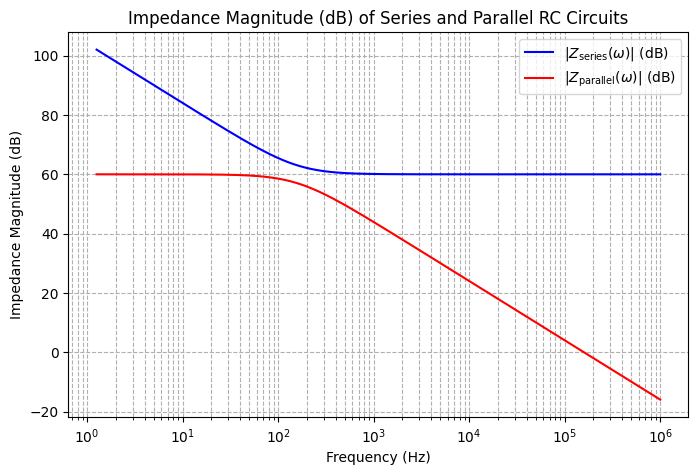

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define circuit values
R = 1e3  # 1 kΩ
C = 1e-6 # 1 µF

# Frequency range (10 Hz to 1 MHz)
frequencies = np.logspace(0.1, 6, 1000)  # Hz
omega = 2 * np.pi * frequencies  # Angular frequency

# Compute impedance magnitudes
Z_series = np.sqrt(R**2 + (1 / (omega * C))**2)  # Series RC
Z_parallel = R / np.sqrt(1 + (omega * R * C) ** 2)  # Parallel RC

# Convert impedance magnitudes to dB
Z_series_dB = 20 * np.log10(Z_series)
Z_parallel_dB = 20 * np.log10(Z_parallel)

# Plot impedance magnitudes in dB
plt.figure(figsize=(8, 5))
plt.semilogx(frequencies, Z_series_dB, label=r'$|Z_{\text{series}}(\omega)|$ (dB)', color='b')
plt.semilogx(frequencies, Z_parallel_dB, label=r'$|Z_{\text{parallel}}(\omega)|$ (dB)', color='r')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Magnitude (dB)")
plt.title("Impedance Magnitude (dB) of Series and Parallel RC Circuits")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()
